# Assignment - Multiple Linear Regression - Hollywood

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr04.xls')
#data.head()

# we will get scores to array

X2 = data['X2'].values
X3 = data['X3'].values
X4 = data['X4'].values
X1 = data['X1'].values

# Now we will generate our X, Y and β

m = len(X2)
x0 = np.ones(m)
X_temp = np.array([x0,X2,X3,X4])
X = np.array([x0,X2,X3,X4]).T
# Initial Coefficients
B = np.array([0, 0, 0, 0])
Y = np.array(X1)
alpha = 0.0001

# cost function

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

inital_cost = cost_function(X, Y, B)
#print(inital_cost)


def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost

    return B, cost_history

# Now we will compute final value of β

# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))


*** No CODEPAGE record, no encoding_override: will use 'ascii'
[5.59733963 3.75088825 7.69883046 0.89496649]
17.328881398619632
5.8870844054794444
0.9662654314259487


/home/paritoshyadav/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:726: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/paritoshyadav/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:728: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


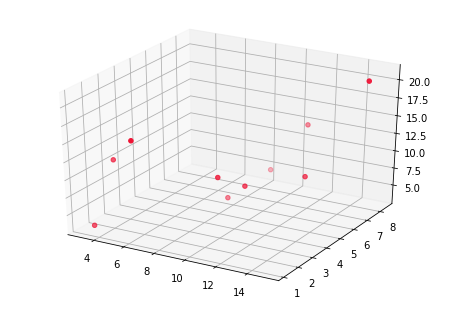

In [2]:
# Ploting the scores as scatter plot
fig = plt.figure()

ax = Axes3D(fig)
# ax.scatter3D(*data.T)
ax.scatter3D(X2, X3, X4, X1, color='#ef1234')
# ax.plot3D(pd.to_numeric(Y_pred))
plt.show()


In [3]:
Y

array([ 85.09999847, 106.3000031 ,  50.20000076, 130.6000061 ,
        54.79999924,  30.29999924,  79.40000153,  91.        ,
       135.3999939 ,  89.30000305])

In [4]:
Y_pred

array([ 80.95026669, 106.51272003,  54.78349535, 121.32059976,
        49.03834703,  31.09642813,  77.27235864, 103.14674701,
       140.13204896,  85.57137147])